In [74]:
from PIL import Image
import torchvision.transforms.functional as functional
from helpers import random_erase
from torchvision.transforms import transforms

In [7]:
img = Image.open("../data/training/images/satImage_023.png")
mask = Image.open("../data/training/groundtruth/satImage_023.png")

In [8]:
imgF = functional.hflip(img)
maskF = functional.hflip(mask)

In [59]:
imgFv = functional.vflip(img)
maskFv = functional.vflip(mask)

In [54]:
imgR = functional.rotate(img, 45)
maskR = functional.rotate(mask, 45)

In [10]:
imgGS = functional.rgb_to_grayscale(img, num_output_channels=3)

In [39]:
to_tensor = transforms.ToTensor()
imgT = to_tensor(img)
imgRE = random_erase(imgT, n=5, color_rgb='noise')
to_PIL = transforms.ToPILImage()
imgRE = to_PIL(imgRE)

In [42]:
imgRE.save("../images_report/satImage023_RE.png")

In [44]:
imgGS.save("../images_report/satImage023_GS.png")

In [57]:
imgR.save("../images_report/satImage023_Rot.png")

In [58]:
imgF.save("../images_report/satImage023_HF.png")

In [61]:
imgFv.save("../images_report/satImage023_HV.png")

In [62]:
import matplotlib.pyplot as plt

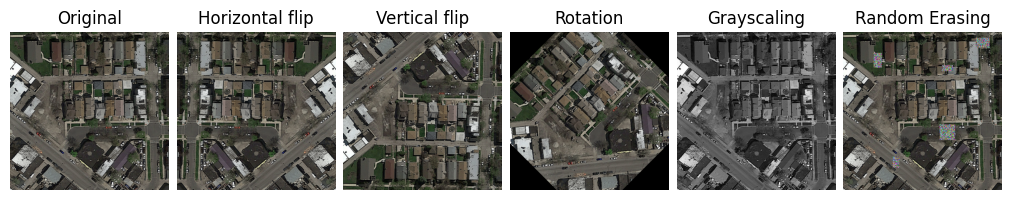

In [73]:
fig, axs = plt.subplots(1,6, figsize=(10, 5), constrained_layout=True)

axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(imgF)
axs[1].set_title("Horizontal flip")
axs[2].imshow(imgFv)
axs[2].set_title("Vertical flip")
axs[3].imshow(imgR)
axs[3].set_title("Rotation")
axs[4].imshow(imgGS)
axs[4].set_title("Grayscaling")
axs[5].imshow(imgRE)
axs[5].set_title("Random Erasing")

for i in range(6):
    axs[i].axis('off')

plt.savefig("../images_report/data_augmntation_example.png")